# VERİ MADENCİLİĞİ 

GLOBAL TERÖRİZM VERİ SETİ 
türkiyede Kaç kişinn  öleceği üzerine bir tahminleme modeli 


çalışmış olduğum verisetinde 1970-2016 yılları arasında dünya üzerinde gerçekleşen terör olaylarını içermektedir güncek GTB sitesinde sürekli olarak güncel veriler verilmekte ve paylaşılmaktadır.

veri seti kaggle.com üzerinden ilgili url "https://www.kaggle.com/datasets/omercolakoglu/global-terrorism-database-turkish"
ve diğer farklı yıllara ait veri seti GTB global terorızm database sitesinden  alınmıştır site url "https://www.start.umd.edu/gtd/"



veri madenciliği uygularken kullandığımız python kütüphaneleri 

In [3]:
import numpy as np
import pandas as pd
import chardet
from IPython.display import Image
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import mean_absolute_error as mae
from sklearn.tree import DecisionTreeRegressor as dtr
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans



veri setindeki çağrılan ilk 10 satırın içeriğinde NA değerleri içermektedir

In [4]:
df = pd.read_csv('//Users/omerfaruksezer//Downloads//globalterrorismdb_shorter.csv', encoding='ISO-8859-1', header = 0,usecols=['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'latitude', 'longitude','success', 'suicide','attacktype1','attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1','natlty1_txt','weaptype1', 'weaptype1_txt' ,'nkill','multiple', 'individual', 'claimed','nkill','nkillter', 'nwound', 'nwoundte'])
df.head(10)

,iyear,imonth,iday,extended,country,country_txt,region,latitude,longitude,multiple,...,natlty1,natlty1_txt,individual,claimed,weaptype1,weaptype1_txt,nkill,nkillter,nwound,nwoundte
0,1970,7,2,0,58,Dominican Republic,2,18.456792,-69.951164,0,...,58.0,Dominican Republic,0,NaN,13,Unknown,1.0,NaN,0.0,NaN
1,1970,0,0,0,130,Mexico,1,19.432608,-99.133207,0,...,21.0,Belgium,0,NaN,13,Unknown,0.0,NaN,0.0,NaN
2,1970,1,0,0,160,Philippines,5,15.478598,120.599741,0,...,217.0,United States,0,NaN,13,Unknown,1.0,NaN,0.0,NaN
3,1970,1,0,0,78,Greece,8,37.983773,23.728157,0,...,217.0,United States,0,NaN,6,Explosives/Bombs/Dynamite,NaN,NaN,NaN,NaN
4,1970,1,0,0,101,Japan,4,33.580412,130.396361,0,...,217.0,United States,0,NaN,8,Incendiary,NaN,NaN,NaN,NaN
5,1970,1,1,0,217,United States,1,37.005105,-89.176269,0,...,217.0,United States,0,0.0,5,Firearms,0.0,0.0,0.0,0.0
6,1970,1,2,0,218,Uruguay,3,-34.891151,-56.187214,0,...,218.0,Uruguay,0,NaN,5,Firearms,0.0,NaN,0.0,NaN
7,1970,1,2,0,217,United States,1,37.805065,-122.273024,0,...,217.0,United States,0,0.0,6,Explosives/Bombs/Dynamite,0.0,0.0,0.0,0.0
8,1970,1,2,0,217,United States,1,43.076592,-89.412488,0,...,217.0,United States,0,1.0,8,Incendiary,0.0,0.0,0.0,0.0
9,1970,1,3,0,217,United States,1,43.072950,-89.386694,0,...,217.0,United States,0,0.0,8,Incendiary,0.0,0.0,0.0,0.0


burada verisetindeki ülke kodlarından olan 209 numaralı türkiye kodunu ana verisetinden çekip yeni bir veri seti olarak df_turkey  olarak tanımlıyoruz

In [5]:
df_turkey = df[df.country == 209]



In [6]:
df_turkey.head(200)

,iyear,imonth,iday,extended,country,country_txt,region,latitude,longitude,multiple,...,natlty1,natlty1_txt,individual,claimed,weaptype1,weaptype1_txt,nkill,nkillter,nwound,nwoundte
226,1970,4,25,0,209,Turkey,10,41.014836,28.961414,0,...,97.0,Israel,0,NaN,6,Explosives/Bombs/Dynamite,0.0,NaN,0.0,NaN
486,1970,8,31,0,209,Turkey,10,39.918392,32.865597,0,...,217.0,United States,0,NaN,6,Explosives/Bombs/Dynamite,0.0,NaN,0.0,NaN
531,1970,10,2,0,209,Turkey,10,38.423708,27.134205,0,...,217.0,United States,0,NaN,6,Explosives/Bombs/Dynamite,0.0,NaN,0.0,NaN
534,1970,10,3,0,209,Turkey,10,39.918392,32.865597,0,...,217.0,United States,0,NaN,6,Explosives/Bombs/Dynamite,NaN,NaN,NaN,NaN
535,1970,10,3,0,209,Turkey,10,39.918392,32.865597,0,...,217.0,United States,0,NaN,6,Explosives/Bombs/Dynamite,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,1977,7,13,0,209,Turkey,10,39.922071,32.853471,0,...,NaN,NaN,0,NaN,5,Firearms,0.0,NaN,1.0,NaN
4941,1977,7,13,0,209,Turkey,10,37.868792,32.484456,0,...,209.0,Turkey,0,NaN,6,Explosives/Bombs/Dynamite,0.0,0.0,0.0,0.0
4951,1977,7,14,0,209,Turkey,10,41.015059,28.940847,0,...,209.0,Turkey,0,NaN,6,Explosives/Bombs/Dynamite,0.0,0.0,0.0,0.0
4953,1977,7,15,0,209,Turkey,10,37.001163,35.331687,0,...,209.0,Turkey,0,NaN,6,Explosives/Bombs/Dynamite,NaN,NaN,NaN,NaN


In [7]:
df_turkey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4106 entries, 226 to 170026
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            4106 non-null   int64  
 1   imonth           4106 non-null   int64  
 2   iday             4106 non-null   int64  
 3   extended         4106 non-null   int64  
 4   country          4106 non-null   int64  
 5   country_txt      4106 non-null   object 
 6   region           4106 non-null   int64  
 7   latitude         3942 non-null   float64
 8   longitude        3942 non-null   float64
 9   multiple         4106 non-null   int64  
 10  success          4106 non-null   int64  
 11  suicide          4106 non-null   int64  
 12  attacktype1      4106 non-null   int64  
 13  attacktype1_txt  4106 non-null   object 
 14  targtype1        4106 non-null   int64  
 15  targtype1_txt    4106 non-null   object 
 16  natlty1          4085 non-null   float64
 17  natlty1_txt    

# eksik verilerileri üzerinde işlem 
1- isnull() : eksik değerler için true gönderir.
2- notnull(): isnull tam tersi işlem yapar.
3- dropna() : eksik verileri kaldırır.
4- fillna() : eksik verileri doldurur.



In [8]:
df_turkey = df_turkey.drop([ 'region', 'country', 'country_txt','claimed', 'nkillter', 'nwoundte'],axis=1)

In [9]:
len(df_turkey.columns)

20

In [10]:
len(df.columns)

26

ana verisetinden sadece türkiye ile ilgilendiğimiz için bölge adı, ülke kodu ve ülke adı ve diğer gereksiz boş NAN değerler içeren sütünları kaldırabiliriz. 

In [11]:
df_turkey.isnull().sum()

iyear                0
imonth               0
iday                 0
extended             0
latitude           164
longitude          164
multiple             0
success              0
suicide              0
attacktype1          0
attacktype1_txt      0
targtype1            0
targtype1_txt        0
natlty1             21
natlty1_txt         21
individual           0
weaptype1            0
weaptype1_txt        0
nkill              132
nwound             158
dtype: int64

In [12]:
df_turkey['nkill'].isnull().sum()

132

In [13]:
df_turkey['nwound'].dropna()


226        0.0
486        0.0
531        0.0
535        0.0
539        0.0
          ... 
169752    82.0
169845     0.0
169930    53.0
169988     3.0
170026     0.0
Name: nwound, Length: 3948, dtype: float64

In [14]:
df_turkey.head()

,iyear,imonth,iday,extended,latitude,longitude,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill,nwound
226,1970,4,25,0,41.014836,28.961414,0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,97.0,Israel,0,6,Explosives/Bombs/Dynamite,0.0,0.0
486,1970,8,31,0,39.918392,32.865597,0,1,0,3,Bombing/Explosion,4,Military,217.0,United States,0,6,Explosives/Bombs/Dynamite,0.0,0.0
531,1970,10,2,0,38.423708,27.134205,0,1,0,3,Bombing/Explosion,4,Military,217.0,United States,0,6,Explosives/Bombs/Dynamite,0.0,0.0
534,1970,10,3,0,39.918392,32.865597,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States,0,6,Explosives/Bombs/Dynamite,NaN,NaN
535,1970,10,3,0,39.918392,32.865597,0,1,0,3,Bombing/Explosion,1,Business,217.0,United States,0,6,Explosives/Bombs/Dynamite,0.0,0.0


In [15]:
df_turkey.isnull().sum()

iyear                0
imonth               0
iday                 0
extended             0
latitude           164
longitude          164
multiple             0
success              0
suicide              0
attacktype1          0
attacktype1_txt      0
targtype1            0
targtype1_txt        0
natlty1             21
natlty1_txt         21
individual           0
weaptype1            0
weaptype1_txt        0
nkill              132
nwound             158
dtype: int64

In [16]:
df_turkey.describe()

,iyear,imonth,iday,extended,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill,nwound
count,4106.000000,4106.000000,4106.000000,4106.000000,3942.000000,3942.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4085.000000,4106.000000,4106.000000,3974.000000,3948.000000
mean,1998.349489,6.496590,16.048466,0.024598,38.988434,36.297783,0.113249,0.915733,0.016561,3.071359,6.755967,208.355202,0.000731,6.285679,1.676900,2.424519
std,13.257384,3.115732,8.779937,0.154916,1.558787,5.907184,0.316935,0.277822,0.127636,1.815490,6.113811,36.949543,0.027024,2.031656,4.460954,11.540222
min,1970.000000,0.000000,0.000000,0.000000,35.819484,26.303357,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,2.000000,0.000000,0.000000
25%,1991.000000,4.000000,9.000000,0.000000,37.518974,28.960465,0.000000,1.000000,0.000000,2.000000,2.000000,209.000000,0.000000,5.000000,0.000000,0.000000
50%,1994.000000,7.000000,16.000000,0.000000,38.504136,38.276758,0.000000,1.000000,0.000000,3.000000,4.000000,209.000000,0.000000,6.000000,0.000000,0.000000
75%,2014.000000,9.000000,24.000000,0.000000,41.008342,41.491430,0.000000,1.000000,0.000000,3.000000,14.000000,209.000000,0.000000,6.000000,2.000000,1.000000
max,2016.000000,12.000000,31.000000,1.000000,41.954099,44.799770,1.000000,1.000000,1.000000,9.000000,22.000000,999.000000,1.000000,13.000000,105.000000,245.000000


türkiyede olan 1970-2016 yılına ait terör olaylarındaki ortalama  gerçekleştiği ay haziran ayı ile temmuz ayı olarak söylebiliriz gün olarak ise her yine ortalama her ayın 16' sı olarak yorumlanabilir. Yaşana bu saldırılarda ölen kişi sayısı ortalama 1.6 kişi yaralı sayısı ise 2.4 olarak söyleyebiliriz.

In [17]:
df_turkey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4106 entries, 226 to 170026
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            4106 non-null   int64  
 1   imonth           4106 non-null   int64  
 2   iday             4106 non-null   int64  
 3   extended         4106 non-null   int64  
 4   latitude         3942 non-null   float64
 5   longitude        3942 non-null   float64
 6   multiple         4106 non-null   int64  
 7   success          4106 non-null   int64  
 8   suicide          4106 non-null   int64  
 9   attacktype1      4106 non-null   int64  
 10  attacktype1_txt  4106 non-null   object 
 11  targtype1        4106 non-null   int64  
 12  targtype1_txt    4106 non-null   object 
 13  natlty1          4085 non-null   float64
 14  natlty1_txt      4085 non-null   object 
 15  individual       4106 non-null   int64  
 16  weaptype1        4106 non-null   int64  
 17  weaptype1_txt  

In [18]:
df_turkey.tail()

,iyear,imonth,iday,extended,latitude,longitude,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill,nwound
169752,2016,12,10,0,41.040413,28.994050,1,1,1,3,Bombing/Explosion,1,Business,209.0,Turkey,0,6,Explosives/Bombs/Dynamite,24.0,82.0
169845,2016,12,13,0,38.398583,27.078404,0,0,0,2,Armed Assault,1,Business,209.0,Turkey,0,9,Melee,0.0,0.0
169930,2016,12,17,0,38.720489,35.482597,0,1,1,3,Bombing/Explosion,4,Military,209.0,Turkey,0,6,Explosives/Bombs/Dynamite,16.0,53.0
169988,2016,12,19,0,39.909138,32.859192,0,1,0,1,Assassination,7,Government (Diplomatic),167.0,Russia,0,5,Firearms,2.0,3.0
170026,2016,12,20,0,39.908201,32.856257,0,0,0,2,Armed Assault,7,Government (Diplomatic),217.0,United States,0,5,Firearms,0.0,0.0


son 5 veri setine bakıyoruz.

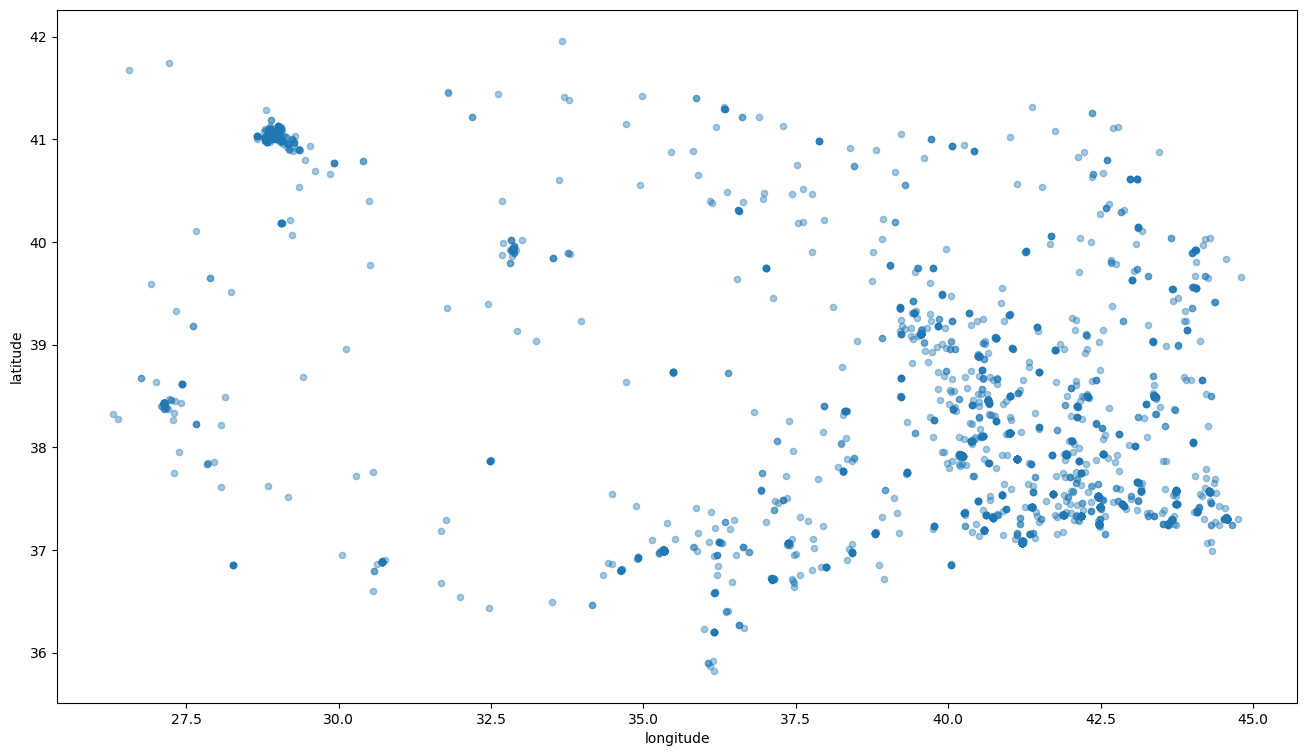

In [19]:
df_turkey.plot(kind= 'scatter', x='longitude', y='latitude', alpha=0.4, figsize=(16,9))
plt.show()

plot gösterimi ile terör olaylarının yaşandığı bölgedeki yoğunluk haritasını göstermektedir

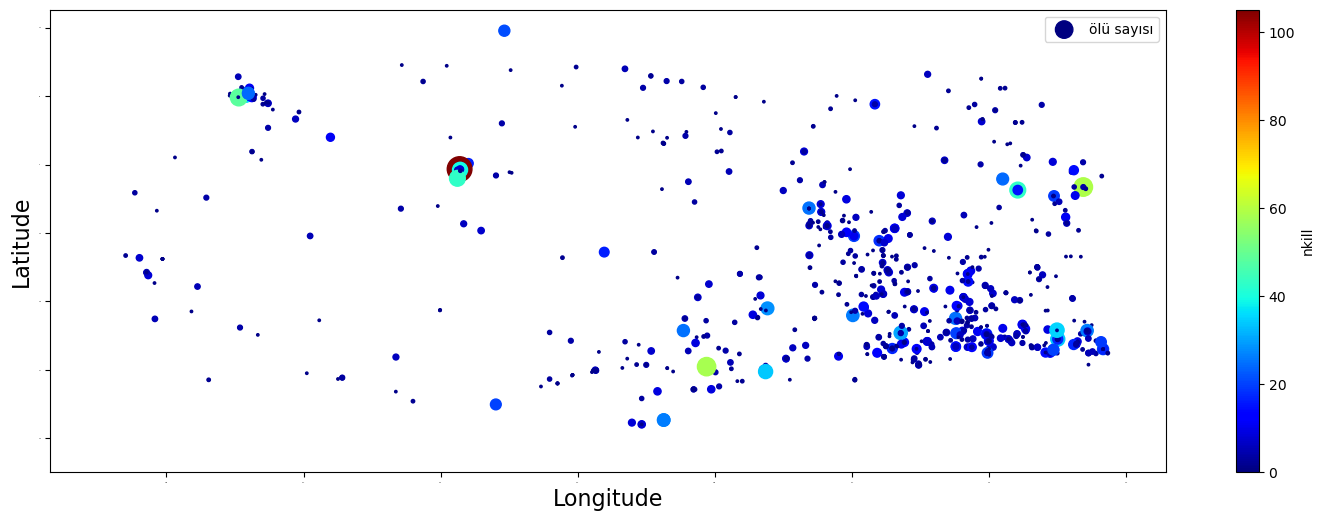

In [20]:
df_turkey.plot(kind= 'scatter', x='longitude', y='latitude', alpha=1.0,  figsize=(18,6),  
               s=df_turkey['nkill']*3, label= 'ölü sayısı', fontsize=1, c='nkill', cmap=plt.get_cmap("jet"), colorbar=True)
plt.ylabel("Latitude", fontsize=16)
plt.xlabel("Longitude", fontsize=16)
plt.show()

In [22]:
terror = np.asarray(df_turkey.groupby('iyear').iyear.count())
successes = np.asarray(df_turkey.groupby('iyear').success.sum())

terror_years = np.arange(1970, 2016)

trace1 = go.Bar(x = terror_years, y = terror, name = 'Terör saldırılarının sayısı')

trace2 = go.Scatter(x = terror_years, y = successes, name = 'Başarılı terörist saldırıların sayısı', line = dict(color = ('rgb(205, 12, 24)'),width=5))

layout = go.Layout(title = 'Yıllara Göre Türkiyedeki Terör Saldırıları (1970-2016)', legend=dict(orientation="h"),
         barmode = 'group')

figure = dict(data = [trace1,trace2], layout = layout)
iplot(figure)


bu harita gösterimide yine enlem ve boylam baz alarak ölü sayısına bağlı farklı renklerde gösteren yoğunluk haritası 

In [30]:
df_turkey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4106 entries, 226 to 170026
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            4106 non-null   int64  
 1   imonth           4106 non-null   int64  
 2   iday             4106 non-null   int64  
 3   extended         4106 non-null   int64  
 4   latitude         3942 non-null   float64
 5   longitude        3942 non-null   float64
 6   multiple         4106 non-null   int64  
 7   success          4106 non-null   int64  
 8   suicide          4106 non-null   int64  
 9   attacktype1      4106 non-null   int64  
 10  attacktype1_txt  4106 non-null   object 
 11  targtype1        4106 non-null   int64  
 12  targtype1_txt    4106 non-null   object 
 13  natlty1          4085 non-null   float64
 14  natlty1_txt      4085 non-null   object 
 15  individual       4106 non-null   int64  
 16  weaptype1        4106 non-null   int64  
 17  weaptype1_txt  

In [31]:
df_turkey.describe()

,iyear,imonth,iday,extended,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill,nwound
count,4106.000000,4106.000000,4106.000000,4106.000000,3942.000000,3942.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4085.000000,4106.000000,4106.000000,3974.000000,3948.000000
mean,1998.349489,6.496590,16.048466,0.024598,38.988434,36.297783,0.113249,0.915733,0.016561,3.071359,6.755967,208.355202,0.000731,6.285679,1.676900,2.424519
std,13.257384,3.115732,8.779937,0.154916,1.558787,5.907184,0.316935,0.277822,0.127636,1.815490,6.113811,36.949543,0.027024,2.031656,4.460954,11.540222
min,1970.000000,0.000000,0.000000,0.000000,35.819484,26.303357,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,2.000000,0.000000,0.000000
25%,1991.000000,4.000000,9.000000,0.000000,37.518974,28.960465,0.000000,1.000000,0.000000,2.000000,2.000000,209.000000,0.000000,5.000000,0.000000,0.000000
50%,1994.000000,7.000000,16.000000,0.000000,38.504136,38.276758,0.000000,1.000000,0.000000,3.000000,4.000000,209.000000,0.000000,6.000000,0.000000,0.000000
75%,2014.000000,9.000000,24.000000,0.000000,41.008342,41.491430,0.000000,1.000000,0.000000,3.000000,14.000000,209.000000,0.000000,6.000000,2.000000,1.000000
max,2016.000000,12.000000,31.000000,1.000000,41.954099,44.799770,1.000000,1.000000,1.000000,9.000000,22.000000,999.000000,1.000000,13.000000,105.000000,245.000000


In [32]:
df_turkey['nkill'].fillna(1.676900, inplace=True)
df_turkey['nwound'].fillna(2.424519, inplace=True)
df_turkey['latitude'].fillna(38.988434, inplace=True)
df_turkey['longitude'].fillna(36.297783, inplace=True)
df_turkey["natlty1"].fillna(209, inplace=True)
df_turkey["natlty1_txt"].fillna("Turkey", inplace=True)
df_turkey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4106 entries, 226 to 170026
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            4106 non-null   int64  
 1   imonth           4106 non-null   int64  
 2   iday             4106 non-null   int64  
 3   extended         4106 non-null   int64  
 4   latitude         4106 non-null   float64
 5   longitude        4106 non-null   float64
 6   multiple         4106 non-null   int64  
 7   success          4106 non-null   int64  
 8   suicide          4106 non-null   int64  
 9   attacktype1      4106 non-null   int64  
 10  attacktype1_txt  4106 non-null   object 
 11  targtype1        4106 non-null   int64  
 12  targtype1_txt    4106 non-null   object 
 13  natlty1          4106 non-null   float64
 14  natlty1_txt      4106 non-null   object 
 15  individual       4106 non-null   int64  
 16  weaptype1        4106 non-null   int64  
 17  weaptype1_txt  

# eğitim ve test ayrımı  
Verilerimizi bir eğitim setine (%80) ve test setine (%20) olarak ayırıyoruz . Tahmin etmeye çalıştığım değişken 'nkill' yani ölü sayısı bu değişkene bağlı olarak yorumlarda bulunacağız.


bundan önce txt içeren metinsel ifadeleri çıkarmam gerekiyor doğru bir çıkarımda bulunabilmek için bu işlemi gerçekleştiriyoruz.


bağımsız değişkenler ile sutünleri belirleyip sonrasında y_nkill ilede hedef değişkeni seçiyoruz y_nkill
sonrasında eğitim (%80) ve test verisi(%20) olarak ikiye ayırıyoruz 

In [106]:
columns = ['imonth', 'iday', 'extended', 'latitude', 'longitude', 'multiple','success', 'suicide', 'attacktype1', 'targtype1', 'natlty1','individual', 'weaptype1']
X_nkill = df_turkey[coumns]
y_nkill = df_turkey["nkill"]
X_nkill_train, X_nkill_val, y_nkill_train, y_nkill_val = train_test_split(X_nkill, y_nkill, test_size=0.20, random_state=42)

In [131]:
nkill_model = rfr(random_state = 42, n_estimators = 10)
nkill_model.fit(X_nkill,y_nkill)

month = 10
day = 3
extended = 0
latitude = 37.3076 
longitude = 44.5724
multiple = 1
success = 1
suicide = 1
attackType = 8
targetType = 11
natlty1 = 209
individual = 1
weaponType = 12

kill_count = nkill_model.predict([[month,day,extended,latitude,longitude,multiple,success,suicide,
                                   attackType,targetType,individual,weaponType, natlty1]])
print("Maalesef, bu saldırı "+str(int(kill_count[0]))+" kişinin yaşamına son verecek")


Maalesef, bu saldırı 43 kişinin yaşamına son verecek


/Users/omerfaruksezer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [24]:
df_turkey.groupby(by= 'attacktype1_txt').count()['nkill']

attacktype1_txt
Armed Assault                          1220
Assassination                           429
Bombing/Explosion                      1775
Facility/Infrastructure Attack          271
Hijacking                                13
Hostage Taking (Barricade Incident)      13
Hostage Taking (Kidnapping)             122
Unarmed Assault                          10
Unknown                                 121
Name: nkill, dtype: int64

In [25]:
df_turkey.groupby(by= 'iyear').sum()['nwound']

iyear
1970       1.0
1971       0.0
1972       5.0
1974       1.0
1975       0.0
1976      23.0
1977      89.0
1978     111.0
1979     118.0
1980      61.0
1981      11.0
1982      71.0
1983      24.0
1984      19.0
1985       0.0
1986       7.0
1987      80.0
1988      21.0
1989      53.0
1990     219.0
1991     300.0
1992     537.0
1994     452.0
1995     216.0
1996      92.0
1997     108.0
1998     108.0
1999     271.0
2000      27.0
2001      40.0
2002       0.0
2003     778.0
2004      92.0
2005     140.0
2006     316.0
2007     122.0
2008     274.0
2009      48.0
2010       7.0
2011     110.0
2012     464.0
2013     192.0
2014      89.0
2015    1103.0
2016    2772.0
Name: nwound, dtype: float64

In [28]:
df_turkey.pivot_table('iyear',index = 'imonth',columns='nkill',aggfunc='sum')

nkill,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,37.0,39.0,43.0,48.0,52.0,55.0,58.0,59.0,77.0,105.0
imonth,,,,,,,,,,,,,,,,,,,,,
1,295610.0,105937.0,25975.0,20023.0,4002.0,5982.0,8005.0,NaN,5976.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,298896.0,89705.0,21969.0,9996.0,11952.0,7990.0,4010.0,1992.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500508.0,139612.0,55930.0,31963.0,15942.0,2016.0,7965.0,2016.0,4003.0,5972.0,...,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,1994.0,NaN
4,363659.0,118046.0,51960.0,29968.0,27933.0,13969.0,13974.0,11951.0,1994.0,2009.0,...,NaN,NaN,1994.0,NaN,NaN,NaN,NaN,1994.0,NaN,NaN
5,321995.0,113998.0,67806.0,35976.0,15988.0,25994.0,12014.0,11983.0,11968.0,1994.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,278263.0,151673.0,60039.0,27925.0,10035.0,17926.0,13951.0,6004.0,3991.0,6031.0,...,1994.0,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN
7,416035.0,175835.0,82042.0,53986.0,35916.0,25991.0,15987.0,9990.0,5980.0,3977.0,...,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,594419.0,192244.0,60193.0,60053.0,35963.0,24043.0,15982.0,9982.0,8009.0,7960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN,NaN,NaN
9,388548.0,181959.0,77907.0,50026.0,31897.0,16006.0,11987.0,9994.0,9997.0,11971.0,...,NaN,NaN,NaN,NaN,1992.0,NaN,NaN,NaN,NaN,NaN


In [34]:
df_turkey.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
latitude           0
longitude          0
multiple           0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
natlty1            0
natlty1_txt        0
individual         0
weaptype1          0
weaptype1_txt      0
nkill              0
nwound             0
dtype: int64

# k-means kümeleme 

#1-küme sayısı (k) değerini belirle 
#2-başlangıç orta noktaları belirle
#3-ilk kümeleri oluştur verileri en yakın merkeze ata
#4-iterasyonlar ile kümeleri en iyi hale getir.


kullancağımız veri seti türüne göre ilgili diğer kütüphaneler çağrılır.


/Users/omerfaruksezer/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



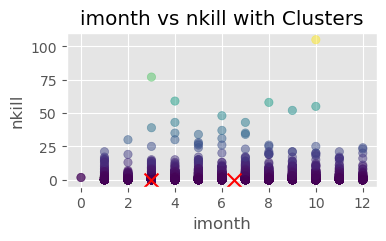

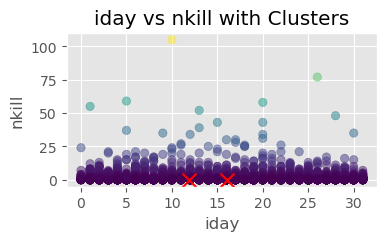

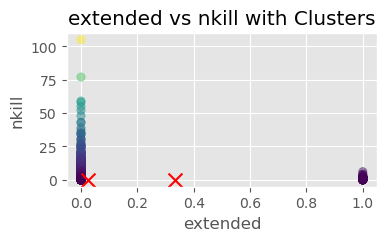

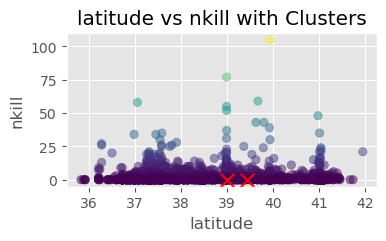

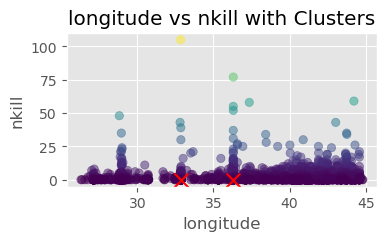

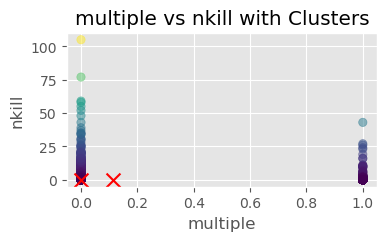

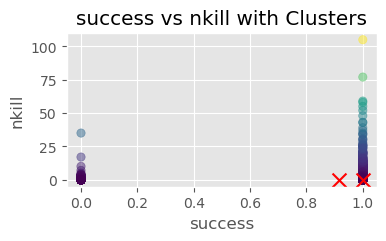

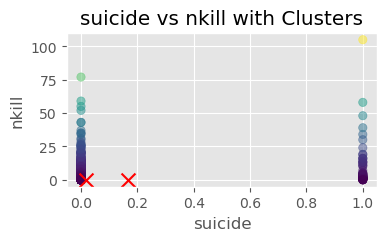

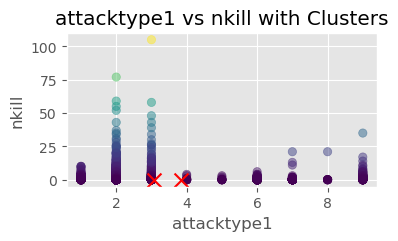

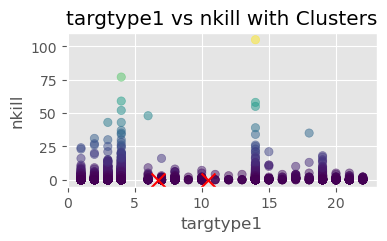

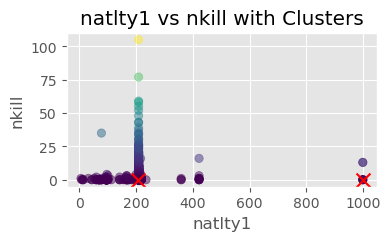

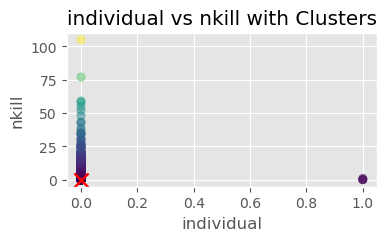

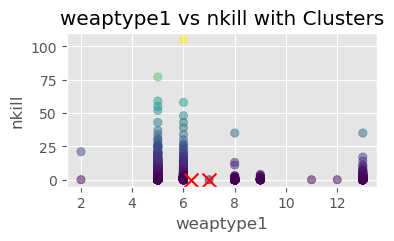

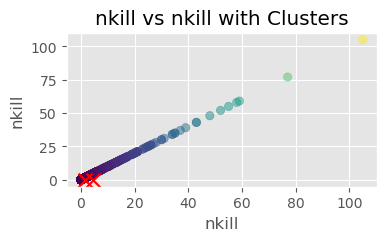

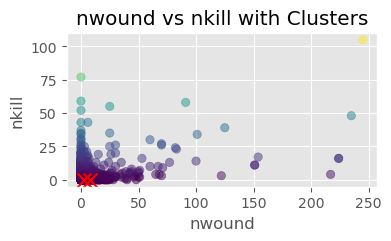

In [150]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df_turkey[['imonth', 'iday', 'extended', 'latitude', 'longitude', 'multiple', 'success', 'suicide', 'attacktype1', 'targtype1', 'natlty1', 'individual', 'weaptype1', 'nkill', 'nwound']]
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_
df_turkey['cluster'] = cluster_labels
cluster_centers = kmeans.cluster_centers_

for feature in X.columns:
    plt.figure(figsize=(4, 2))
    plt.style.use('ggplot')
    
    plt.scatter(X[feature], df_turkey['nkill'], c=y, cmap='viridis', alpha=0.5 ,)
    plt.scatter(cluster_centers[:, X.columns.get_loc(feature)], [0, 0], marker='x', color='red', s=100)
    plt.title(f'{feature} vs nkill with Clusters')
    plt.xlabel(feature)
    plt.ylabel('nkill')
    plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score =(X_nkill,y_nkill)

In [110]:
plt.style.use('ggplot')

In [ ]:
plt.scatter()

<Axes: ylabel='Frequency'>

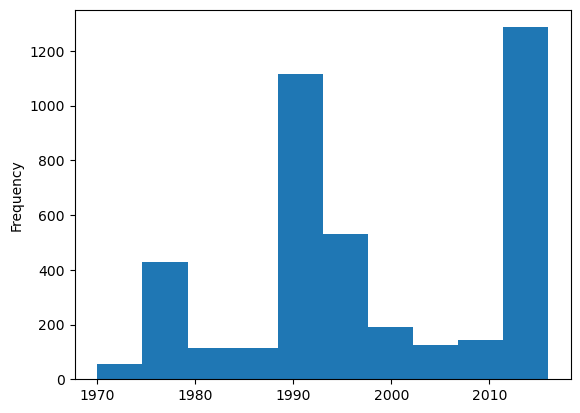

In [17]:
df_turkey['iyear'].plot(kind = 'hist')